[參考資料-1](https://medium.com/@upchen_/%E5%A6%82%E4%BD%95%E5%9C%A8-colab-%E5%AE%89%E8%A3%9D-darknet-%E6%A1%86%E6%9E%B6%E8%A8%93%E7%B7%B4-yolo-v3-%E7%89%A9%E4%BB%B6%E8%BE%A8%E8%AD%98%E4%B8%A6%E4%B8%94%E6%9C%80%E4%BD%B3%E5%8C%96-colab-%E7%9A%84%E8%A8%93%E7%B7%B4%E6%B5%81%E7%A8%8B-e5ded7bbab00)<br>
[參考資料-2](https://medium.com/@upchen_/%E5%9C%A8-colab-%E4%B8%8A%E5%88%A9%E7%94%A8-yolov3-%E6%A1%86%E6%9E%B6%E5%92%8C%E8%87%AA%E6%9C%89%E6%A8%99%E8%A8%BB%E8%B3%87%E6%96%99%E4%BE%86%E8%A8%93%E7%B7%B4%E8%87%AA%E5%B7%B1%E7%9A%84%E7%89%A9%E4%BB%B6%E8%BE%A8%E8%AD%98%E7%B3%BB%E7%B5%B1-ac36533f99a7)<br>
[官方文件](https://github.com/AlexeyAB/darknet)

In [ ]:
import cv2
cv2.__version__

'4.1.2'

# 載入雲端硬碟

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)



Mounted at /content/gdrive


[cfg設定請參考](https://medium.com/@chih.sheng.huang821/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E7%89%A9%E4%BB%B6%E5%81%B5%E6%B8%ACyolov1-yolov2%E5%92%8Cyolov3-cfg-%E6%AA%94%E8%A7%A3%E8%AE%80-75793cd61a01)<br>
特別注意cfg當中的yolo有"三層"以及yolo前一層的filter(一共6層)需要根據class數量重新調整<br>
[cfg_archor調整](https://blog.csdn.net/hrsstudy/article/details/71173305)(非必要)

In [ ]:
import os

os.listdir()

['.config', 'gdrive', 'sample_data']

# 選定專案資料夾(事先在雲端硬碟創建)
結構<br>
└─專案資料夾(此處為Space_Colab)<br>
&emsp;&emsp;├─cfg<br>
&emsp;&emsp;├─cuDNN<br>
&emsp;&emsp;├─Images<br>
&emsp;&emsp;├─Labels<br>
&emsp;&emsp;├─weights<br>
&emsp;&emsp;└─yolos

In [ ]:
os.chdir("gdrive/My Drive/Space_Colab/")
os.listdir()

['weights',
 'cfg',
 'darknet53.conv.74',
 'Format.py',
 'cuDNN',
 '__pycache__',
 'train_yolo_with_custom_dataset_on_colab_101',
 'darknet',
 'Labels',
 'Images',
 'yolos',
 'bad.list',
 'manifast.txt',
 'chart.png']

# 在colab環境安裝cuda
檔案請放置於專案資料夾下的cuDNN資料夾<br>
/content/gdrive/My\ Drive/專案資料夾/cuDNN/<br>
[下載地址](http://people.cs.uchicago.edu/~kauffman/nvidia/cudnn/)

In [ ]:
!tar -xvf /content/gdrive/My\ Drive/Space_Colab/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a


In [ ]:
!chmod a+r /usr/local/cuda/include/cudnn.h
# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


# 將darknet相關元件clone至雲端硬碟

In [ ]:
# %cd /content/gdrive/My\ Drive/Space_Colab/
# !git clone https://github.com/pjreddie/darknet darknet_source
# %cd darknet_source
# # 修改 Darknet 設定，符合 Colab 環境
# !sed -i "s/GPU=0/GPU=1/g" Makefile
# !sed -i "s/CUDNN=0/CUDNN=1/g" Makefile
# !sed -i "s/OPENCV=0/OPENCV=1/g" Makefile
# # 編譯
# !make
# 以下兩段未使用
# # 將編譯完成的執行檔複製回 Google Drive
# # !cp ./darknet /app/darknet
# # !cp ./darknet /content/darknet
# %cd /content

# 下載darknet範本進行環境測試(已測試不須使用 耗時)

In [ ]:
# %cd /content/gdrive/My\ Drive/Space_Colab/darknet_source
# !wget https://pjreddie.com/media/files/yolov3.weights
# !/content/gdrive/My\ Drive/Space_Colab/darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

In [ ]:
# import cv2
# from google.colab.patches import cv2_imshow
# img = cv2.imread("predictions.jpg", cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)

# 若有現成編譯好的darknet可以直接複製使用

In [ ]:
# 複製之前編譯好的darknet
# %cd /content
# !cp /app/darknet ./
# 權限調整
!chmod +x /content/gdrive/My\ Drive/Space_Colab/darknet

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


# 定義路徑(無跳脫字元)

In [ ]:
# define constants

LOCAL_IMAGES_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/Images"
LOCAL_LABELS_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/Labels"
LOCAL_YOLOS_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/yolos"
LOCAL_CFG_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/cfg"
GDRIVE_APP_BASE_DIR_REMOTE_PATH = "/drive/My Drive/train_yolo_with_custom_dataset_on_colab_101"

GDRIVE_APP_BASE_DIR_PATH = "/content/gdrive/My Drive/Space_Colab"
GDRIVE_WEIGHTS_DIR_PATH = GDRIVE_APP_BASE_DIR_PATH+"/weights"
GDRIVE_CFG_DIR_PATH = GDRIVE_APP_BASE_DIR_PATH+"/cfg"
GITHUB_CODEBASE_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/train_yolo_with_custom_dataset_on_colab_101"

GDRIVE_DARKNET_BIN_FILE_PATH = GITHUB_CODEBASE_DIR_PATH+"/darknet"


In [ ]:
# %cd /content/gdrive/My Drive/Space_Colab/
# !git clone https://github.com/wallat/train_yolo_with_custom_dataset_on_colab_101.git

# 載入現成的套件
[下載完請放入專案資料夾](https://drive.google.com/file/d/1rwiXbSSgDY13YpTNl537plw1SubiPWzV/view?usp=sharing)

In [ ]:
!ls /content/gdrive/My\ Drive/Space_Colab/*.py

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
'/content/gdrive/My Drive/Space_Colab/Format.py'


In [ ]:
# 修改環境變數
import sys
sys.path.append('/content/gdrive/My Drive/Space_Colab/')

# 建立標籤檔案(obj.name)

In [ ]:
import glob
import os
import re
labels = set()
for path in glob.glob(os.path.join(LOCAL_LABELS_DIR_PATH, "*.xml")):
    with open(path, 'r') as f:
        content = f.read()
    # extract label names
    matches = re.findall(r'<name>([\w_]+)<\/name>', content, flags=0)
    labels.update(matches)
# write label into file
# 標籤有更新才需要取消此註解
with open(os.path.join(LOCAL_CFG_DIR_PATH, "obj.names"), 'w') as f:
    f.write("\n".join(labels))
print('Read in %d labels: %s' % (len(labels), ", ".join(labels)))

Read in 34 labels: K, W, R, H, 1, E, I, 8, 6, N, D, F, V, U, S, J, 3, T, 4, 9, A, 7, Z, L, Y, X, C, M, Q, 5, B, 2, G, P


# 將pascal xml轉換成yolo格式

In [ ]:
import sys
from Format import VOC, YOLO
voc = VOC()
yolo = YOLO(os.path.join(LOCAL_CFG_DIR_PATH, "obj.names"))
flag, data = voc.parse(LOCAL_LABELS_DIR_PATH)
flag, data = yolo.generate(data)
flag, data = yolo.save(data,
    save_path=LOCAL_YOLOS_DIR_PATH,
    img_path=LOCAL_IMAGES_DIR_PATH, img_type=".jpg", manipast_path="./")

l ['K', 'W', 'R', 'H', '1', 'E', 'I', '8', '6', 'N', 'D', 'F', 'V', 'U', 'S', 'J', '3', 'T', '4', '9', 'A', '7', 'Z', 'L', 'Y', 'X', 'C', 'M', 'Q', '5', 'B', '2', 'G', 'P']

VOC Parsing:   |████████████████████████████████████████| 100.0% (302/302)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (302/302)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (302/302)  Complete



# 調整路徑(有跳脫字元)

In [ ]:
LOCAL_IMAGES_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab/Images"
LOCAL_YOLOS_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab/yolos"

# 將圖片檔案複製到yolos 也可以手動複製


In [ ]:
!cp {LOCAL_IMAGES_DIR_PATH}/*.jpg {LOCAL_YOLOS_DIR_PATH}

In [ ]:
# create the cfg file
# !cp {GITHUB_CODEBASE_DIR_PATH}/darknet_cfg/yolov3.cfg {GDRIVE_CFG_DIR_PATH}/yolov3.cfg

# fetch label_names
with open(os.path.join(GDRIVE_CFG_DIR_PATH, "obj.names"), 'r') as f:
  f_content = f.read()
label_names = f_content.strip().splitlines()

# update the cfg file
with open(os.path.join(GDRIVE_CFG_DIR_PATH, "yolov3.cfg"), 'r') as f:
  content = f.read()
# 設定cfg相關數值
# 此處是「取代」　需要先檢查原文件數值才有效
# 建議從本地修改yolov3.cfg之後放入cfg資料夾
with open(os.path.join(GDRIVE_CFG_DIR_PATH, "yolov3.cfg"), 'w') as f:
  # 執行總次數 假設已訓練1000次 要再訓練100次需輸入1100
  num_max_batches = 8500
  ignore_thresh = .75
  content = content.replace("max_batches = 8000", "max_batches = "+str(num_max_batches))
  content = content.replace("ignore_thresh = .75", "ignore_thresh = "+str(ignore_thresh))

  f.write(content)

# 調整路徑(無跳脫字元)

In [ ]:
LOCAL_IMAGES_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/Images"
LOCAL_CFG_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/cfg"
LOCAL_YOLOS_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/yolos"

# 切換至圖片資料夾

In [ ]:
import os
cur_cwd = os.getcwd()
os.chdir("Images")

# 將現有圖片路徑寫入訓練目錄

In [ ]:
# create train and test files
import random
import glob
os.chdir(LOCAL_IMAGES_DIR_PATH)
paths = os.listdir()
random.shuffle(paths)
# 訓練與測試資料集配置
num_train_images = int(len(paths)*0.85)
with open(os.path.join(LOCAL_CFG_DIR_PATH, "train.txt"), 'w+') as f:
  for path in paths[:num_train_images]:
    f.write("%s/%s\n"%(LOCAL_YOLOS_DIR_PATH, os.path.basename(path)))
with open(os.path.join(LOCAL_CFG_DIR_PATH, "test.txt"), 'w+') as f:
  for path in paths[num_train_images:]:
    f.write("%s/%s\n" % (LOCAL_YOLOS_DIR_PATH, os.path.basename(path)))

# 設定捷徑以便正確讀取檔案

In [ ]:
!ln -fs "/content/gdrive/My Drive/Space_Colab/cfg" /cfg
!ln -fs "/content/gdrive/My Drive/Space_Colab/weights" /weights

# 將重要參數的位置寫入obj.data

In [ ]:
# create obj.data
with open(os.path.join("/content/gdrive/My Drive/Space_Colab/cfg", "obj.data"), 'w') as f:
  f.write("classes=%d\n" % (len(label_names)))
  f.write("train=/cfg/train.txt\n")
  f.write("valid=/cfg/test.txt\n")
  f.write("names=/cfg/obj.names\n")
  f.write("backup=/weights\n")

# 設定darknet執行權限


In [ ]:
# !cp {GDRIVE_DARKNET_BIN_FILE_PATH} /content/
# 權限調整
!chmod +x /content/gdrive/My\ Drive/Space_Colab/darknet

In [ ]:
# 現成的範例weights檔案 首次訓練使用
# !wget https://pjreddie.com/media/files/darknet53.conv.74

# 調整路徑(有跳脫字元)

In [ ]:
# define constants
# 訓練要使用這個路徑
LOCAL_IMAGES_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab/Images"
LOCAL_LABELS_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab/Labels"
LOCAL_YOLOS_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab/yolos"
LOCAL_CFG_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab/cfg"
GDRIVE_APP_BASE_DIR_REMOTE_PATH = "/drive/My\ Drive/train_yolo_with_custom_dataset_on_colab_101"

GDRIVE_APP_BASE_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab"
GDRIVE_WEIGHTS_DIR_PATH = GDRIVE_APP_BASE_DIR_PATH+"/weights"
GDRIVE_CFG_DIR_PATH = GDRIVE_APP_BASE_DIR_PATH+"/cfg"
GITHUB_CODEBASE_DIR_PATH = "/content/gdrive/My\ Drive/Space_Colab/train_yolo_with_custom_dataset_on_colab_101"

GDRIVE_DARKNET_BIN_FILE_PATH = GITHUB_CODEBASE_DIR_PATH+"/darknet"


In [ ]:
os.chdir("/content/gdrive/My Drive/Space_Colab")

# 首次訓練使用以下程式碼

In [ ]:
# train the model
# !/content/gdrive/My\ Drive/Space_Colab/darknet detector train {LOCAL_CFG_DIR_PATH}/obj.data {LOCAL_CFG_DIR_PATH}/yolov3.cfg darknet53.conv.74 grep "avg loss" -dont_show

# 接續訓練使用以下程式碼

In [ ]:
# train the model with last result
!/content/gdrive/My\ Drive/Space_Colab/darknet detector train {LOCAL_CFG_DIR_PATH}/obj.data {LOCAL_CFG_DIR_PATH}/yolov3.cfg {GDRIVE_WEIGHTS_DIR_PATH}/yolov3_last.weights -dont_show

串流輸出內容已截斷至最後 5000 行。
Region 82 Avg IOU: 0.893756, Class: 0.937105, Obj: 0.953106, No Obj: 0.005412, .5R: 1.000000, .75R: 1.000000,  count: 9
Region 94 Avg IOU: 0.839743, Class: 0.707324, Obj: 0.780607, No Obj: 0.002199, .5R: 1.000000, .75R: 0.888889,  count: 9
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.857340, Class: 0.840239, Obj: 0.757853, No Obj: 0.007215, .5R: 1.000000, .75R: 1.000000,  count: 10
Region 94 Avg IOU: 0.787800, Class: 0.690865, Obj: 0.742062, No Obj: 0.001877, .5R: 1.000000, .75R: 0.800000,  count: 10
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000002, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.863463, Class: 0.962546, Obj: 0.906899, No Obj: 0.009825, .5R: 1.000000, .75R: 1.000000,  count: 10
Region 94 Avg IOU: 0.860396, Class: 0.934636, Obj: 0.905658, No Obj: 0.001845, .5R: 1.000000, .75R: 1.000000,  count: 7
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No O

# 檢視訓練成效

In [ ]:
!/content/gdrive/My\ Drive/Space_Colab/darknet detector map {LOCAL_CFG_DIR_PATH}/obj.data {LOCAL_CFG_DIR_PATH}/yolov3.cfg {GDRIVE_WEIGHTS_DIR_PATH}/yolov3_last.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

# 調整路徑(無跳脫字元)

In [ ]:
# define constants
# 預測要使用這個路徑
LOCAL_IMAGES_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/Images"
LOCAL_LABELS_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/Labels"
LOCAL_YOLOS_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/yolos"
LOCAL_CFG_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/cfg"
GDRIVE_APP_BASE_DIR_REMOTE_PATH = "/drive/My Drive/train_yolo_with_custom_dataset_on_colab_101"

GDRIVE_APP_BASE_DIR_PATH = "/content/gdrive/My Drive/Space_Colab"
GDRIVE_WEIGHTS_DIR_PATH = GDRIVE_APP_BASE_DIR_PATH+"/weights"
GDRIVE_CFG_DIR_PATH = GDRIVE_APP_BASE_DIR_PATH+"/cfg"
GITHUB_CODEBASE_DIR_PATH = "/content/gdrive/My Drive/Space_Colab/train_yolo_with_custom_dataset_on_colab_101"

GDRIVE_DARKNET_BIN_FILE_PATH = GITHUB_CODEBASE_DIR_PATH+"/darknet"


# 框選視覺化測試

TT5VN44


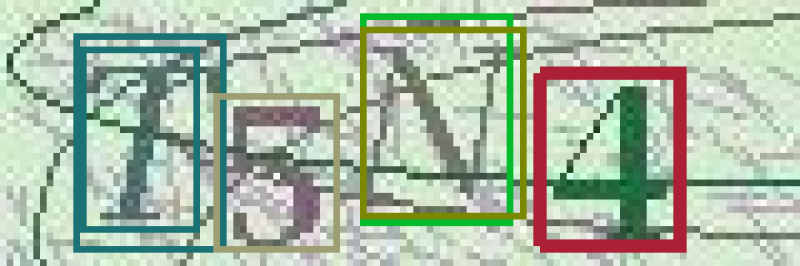

In [ ]:
# TO_DETECTING_IMAGE_DIR_PATH = GITHUB_CODEBASE_DIR_PATH+"/to_detect_images"

# # Use python to read

# import os
# import cv2
# import numpy as np
# import glob
# from google.colab.patches import cv2_imshow
# import pandas as pd
# import pprint
# pp = pprint.PrettyPrinter(indent=4)


# def detecting_one_image(net, output_layers, img):
#   # Detecting objects
#   # cv::dnn::blobFromImage (InputArray image, double scalefactor=1.0, const Size &size=Size(), const Scalar &mean=Scalar(), bool swapRB=false, bool crop=false, int ddepth=CV_32F)
#   blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
#   net.setInput(blob)
#   outs = net.forward(output_layers)

#   return outs

# # Load Yolo
# net = cv2.dnn.readNet(GDRIVE_WEIGHTS_DIR_PATH+"/yolov3_last.weights", GDRIVE_CFG_DIR_PATH+"/yolov3.cfg")
# layer_names = net.getLayerNames()
# output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# # Load label names
# with open(GDRIVE_CFG_DIR_PATH+"/obj.names", "r") as f:
#   classes = [line.strip() for line in f.readlines()]

# # Generate display colors
# colors = np.random.uniform(0, 255, size=(len(classes), 3))




# for fpath in glob.glob(os.path.join(TO_DETECTING_IMAGE_DIR_PATH, "*.jpg"))[2:3]:
#   # print("fpath", fpath)
#   alpha = pd.DataFrame(columns = ["x","y","w","h","alpha"])
#   # Loading image
#   img = cv2.imread(fpath)
#   height, width, channels = img.shape



#   outs = detecting_one_image(net, output_layers, img)
#   # Showing informations on the screen
#   for out in outs:
#     for i,detection in enumerate(out):
#       scores = detection[5:]
#       class_id = np.argmax(scores)
#       confidence = scores[class_id]
#       if confidence > 0.2:
#         # Object detected
#         center_x = int(detection[0] * width)
#         center_y = int(detection[1] * height)
#         w = int(detection[2] * width)
#         h = int(detection[3] * height)

#         # Rectangle coordinates
#         x = int(center_x - w / 2)
#         y = int(center_y - h / 2)
#         alpha.loc[i,"x"] = x
#         alpha.loc[i,"y"] = y
#         alpha.loc[i,"w"] = w
#         alpha.loc[i,"h"] = h

#         alpha.loc[i,"alpha"] = classes[class_id]
#         label = "(%.2f) %s" % (confidence, classes[class_id])
#         alpha.loc[i,"confidence"] = confidence
#         cv2.rectangle(img, (x, y), (x + w, y + h), colors[class_id], 1)
#         # cv2.putText(img, label, (x, y-5), cv2.FONT_HERSHEY_PLAIN, 1, colors[class_id], 1)
#   alpha = alpha.reset_index(drop = True)
#   alpha = alpha.sort_values(by = "confidence",ascending=False)
#   alpha = alpha.sort_values(by = "x")
#   alpha["x_diff"] = alpha["x"]-alpha["x"].shift(1)
#   alpha["y_diff"] = alpha["y"]-alpha["y"].shift(1)
#   alpha = alpha.fillna(999)
#   alpha = alpha.reset_index(drop = True)
#   # alpha = alpha.drop(np.intersect1d(np.where(alpha["x_diff"]<=5),np.where(alpha["y_diff"]<=5)),axis = 0)
#   print("".join(alpha['alpha'].to_list()))

#   if width<800: # resize for display purpose
#     dim = (800, int(800*height/width))
#     img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
#     height, width, channels = img.shape

#   cv2_imshow(img)

# 準備測試資料

In [ ]:
test_file = []

test_ans = glob.glob(os.path.join(LOCAL_YOLOS_DIR_PATH,"*.txt"))
with open(os.path.join(LOCAL_CFG_DIR_PATH,"test.txt"),"r") as f:
  test_file = [line.replace("\n","") for line in f.readlines()]


In [ ]:
test_df = pd.DataFrame(test_file,columns=["file_path"])

In [ ]:
test_df

,file_path
0,/content/gdrive/My Drive/Space_Colab/yolos/7W3...
1,/content/gdrive/My Drive/Space_Colab/yolos/99.jpg
2,/content/gdrive/My Drive/Space_Colab/yolos/67.jpg
3,/content/gdrive/My Drive/Space_Colab/yolos/54.jpg
4,/content/gdrive/My Drive/Space_Colab/yolos/V5T...
...,...
56,/content/gdrive/My Drive/Space_Colab/yolos/8EL...
57,/content/gdrive/My Drive/Space_Colab/yolos/65.jpg
58,/content/gdrive/My Drive/Space_Colab/yolos/G1U...
59,/content/gdrive/My Drive/Space_Colab/yolos/131...


In [ ]:
label_dic = {}
with open(os.path.join(LOCAL_CFG_DIR_PATH,"obj.names"),"r") as f:
  label = f.read()
for i,k in enumerate(label.split("\n")):
  label_dic[i] = k
label_dic

{0: 'K',
 1: 'W',
 2: 'R',
 3: 'H',
 4: '1',
 5: 'E',
 6: 'I',
 7: '8',
 8: '6',
 9: 'N',
 10: 'D',
 11: 'F',
 12: 'V',
 13: 'U',
 14: 'S',
 15: 'J',
 16: '3',
 17: 'T',
 18: '4',
 19: '9',
 20: 'A',
 21: '7',
 22: 'Z',
 23: 'L',
 24: 'Y',
 25: 'X',
 26: 'C',
 27: 'M',
 28: 'Q',
 29: '5',
 30: 'B',
 31: '2',
 32: 'G',
 33: 'P'}

# 載入正確答案

In [ ]:
count = 0
test_df["ans"] = ""
test_df["file_txt"] = test_df["file_path"]
test_df = test_df.fillna("")
test_df["file_txt"] = test_df["file_txt"].apply(lambda x:x.replace(".jpg",".txt"))
for i in test_df["file_txt"]:
  with open(i,"r") as f:
    print()
    test_str = ""
    for s in f.readlines():
      # print(s.split()[:][0])
      test_str += label_dic[int(s.split()[:][0])]
    test_df.loc[count,"ans"] = test_str
    count +=1
test_df["predict"] = ""

# 開始預測

In [ ]:
# Load Yolo
net = cv2.dnn.readNet(GDRIVE_WEIGHTS_DIR_PATH+"/yolov3_last.weights", GDRIVE_CFG_DIR_PATH+"/yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Load label names
with open(GDRIVE_CFG_DIR_PATH+"/obj.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]

# Generate display colors
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for k,fpath in enumerate(test_df["file_path"][38:40]):
  # print("fpath", fpath)
  alpha = pd.DataFrame(columns = ["x","y","w","h","alpha"])
  # Loading image
  img = cv2.imread(fpath)
  height, width, channels = img.shape



  outs = detecting_one_image(net, output_layers, img)
  # Showing informations on the screen
  for out in outs:
    for i,detection in enumerate(out):
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.2:
        # Object detected
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)

        # Rectangle coordinates
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)
        alpha.loc[i,"x"] = x
        alpha.loc[i,"y"] = y
        alpha.loc[i,"w"] = w
        alpha.loc[i,"h"] = h

        alpha.loc[i,"alpha"] = classes[class_id]
        label = "(%.2f) %s" % (confidence, classes[class_id])
        alpha.loc[i,"confidence"] = confidence
  alpha = alpha.reset_index(drop = True)
  alpha = alpha.sort_values(by = "confidence",ascending=False)
  alpha = alpha.sort_values(by = "x")
  alpha["x_diff"] = alpha["x"]-alpha["x"].shift(1)
  alpha["y_diff"] = alpha["y"]-alpha["y"].shift(1)
  alpha = alpha.fillna(999)
  alpha = alpha.reset_index(drop = True)

  # alpha = alpha.drop(np.where(alpha["diff"]<=2)[0],axis = 0)
  alpha = alpha.drop(np.intersect1d(np.where(alpha["x_diff"]<=3),np.where(alpha["y_diff"]<=3)),axis = 0)
  threshold = 6
  while(len(alpha)>5):
    alpha = alpha.reset_index(drop = True)
    alpha = alpha.drop(np.intersect1d(np.where(alpha["x_diff"]<=threshold),np.where(alpha["y_diff"]<=6)),axis = 0)
    threshold +=1
  test_df.loc[k,"predict"] = "".join(alpha['alpha'].to_list())

## 檢視個別預測結果


In [ ]:
alpha = alpha.reset_index(drop = True).sort_values(by = "x")
alpha["diff"] = alpha["x"]-alpha["x"].shift(1)
alpha = alpha.fillna(999)
alpha = alpha.reset_index(drop = True)
alpha = alpha.drop(np.where(alpha["diff"]<=10)[0],axis = 0)
"".join(alpha['alpha'].to_list())

'7W3Z'

# 檢視整體預測成效

In [ ]:
# error_list = test_df[test_df["ans"]!=test_df["predict"]].index
test_df[test_df["ans"]!=test_df["predict"]]

,file_path,ans,file_txt,predict
9,/content/gdrive/My Drive/Space_Colab/yolos/102...,CBZ79,/content/gdrive/My Drive/Space_Colab/yolos/102...,CB779
15,/content/gdrive/My Drive/Space_Colab/yolos/9MI...,9MIT,/content/gdrive/My Drive/Space_Colab/yolos/9MI...,9M1T
39,/content/gdrive/My Drive/Space_Colab/yolos/80.jpg,YRVTQ,/content/gdrive/My Drive/Space_Colab/yolos/80.txt,YVTQ
44,/content/gdrive/My Drive/Space_Colab/yolos/64.jpg,HXJB9,/content/gdrive/My Drive/Space_Colab/yolos/64.txt,HKJB9
45,/content/gdrive/My Drive/Space_Colab/yolos/32.jpg,PUREA,/content/gdrive/My Drive/Space_Colab/yolos/32.txt,PUQEA
47,/content/gdrive/My Drive/Space_Colab/yolos/144...,Q65YP,/content/gdrive/My Drive/Space_Colab/yolos/144...,Q6SYP


In [ ]:
test_df[test_df["ans"]==test_df["predict"]].count()[0]/len(test_df)

0.9016393442622951

## 預測個別檔案

In [ ]:
# 確認路徑
GDRIVE_APP_BASE_DIR_PATH + "/test"

'/content/gdrive/My Drive/Space_Colab/test'

In [ ]:
# # Load Yolo
# net = cv2.dnn.readNet(GDRIVE_WEIGHTS_DIR_PATH+"/yolov3_last.weights", GDRIVE_CFG_DIR_PATH+"/yolov3.cfg")
# layer_names = net.getLayerNames()
# output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# # Load label names
# with open(GDRIVE_CFG_DIR_PATH+"/obj.names", "r") as f:
#   classes = [line.strip() for line in f.readlines()]
# test_path = [GDRIVE_APP_BASE_DIR_PATH + "/test/test.jpg"]
# # Generate display colors
# colors = np.random.uniform(0, 255, size=(len(classes), 3))
# for k,fpath in enumerate(test_path):
#   # print("fpath", fpath)
#   alpha = pd.DataFrame(columns = ["x","y","w","h","alpha"])
#   # Loading image
#   img = cv2.imread(fpath)
#   height, width, channels = img.shape



#   outs = detecting_one_image(net, output_layers, img)
#   # Showing informations on the screen
#   for out in outs:
#     for i,detection in enumerate(out):
#       scores = detection[5:]
#       class_id = np.argmax(scores)
#       confidence = scores[class_id]
#       if confidence > 0.2:
#         # Object detected
#         center_x = int(detection[0] * width)
#         center_y = int(detection[1] * height)
#         w = int(detection[2] * width)
#         h = int(detection[3] * height)

#         # Rectangle coordinates
#         x = int(center_x - w / 2)
#         y = int(center_y - h / 2)
#         alpha.loc[i,"x"] = x
#         alpha.loc[i,"y"] = y
#         alpha.loc[i,"w"] = w
#         alpha.loc[i,"h"] = h

#         alpha.loc[i,"alpha"] = classes[class_id]
#         label = "(%.2f) %s" % (confidence, classes[class_id])
#         alpha.loc[i,"confidence"] = confidence
#   alpha = alpha.reset_index(drop = True)
#   alpha = alpha.sort_values(by = "confidence",ascending=False)
#   alpha = alpha.sort_values(by = "x")
#   alpha["x_diff"] = alpha["x"]-alpha["x"].shift(1)
#   alpha["y_diff"] = alpha["y"]-alpha["y"].shift(1)
#   alpha = alpha.fillna(999)
#   alpha = alpha.reset_index(drop = True)

#   # alpha = alpha.drop(np.where(alpha["diff"]<=2)[0],axis = 0)
#   alpha = alpha.drop(np.intersect1d(np.where(alpha["x_diff"]<=3),np.where(alpha["y_diff"]<=3)),axis = 0)
#   threshold = 6
#   while(len(alpha)>5):
#     alpha = alpha.reset_index(drop = True)
#     alpha = alpha.drop(np.intersect1d(np.where(alpha["x_diff"]<=threshold),np.where(alpha["y_diff"]<=6)),axis = 0)
#     threshold +=1
#   print("".join(alpha['alpha'].to_list()))

S36TY


In [ ]:
# alpha

,x,y,w,h,alpha,confidence,x_diff,y_diff
0,28,15,40,70,3,0.979418,999,999
2,73,16,38,68,8,0.889964,43,-4
3,105,41,35,41,V,0.972739,32,25
4,140,10,61,76,T,0.930078,32,-28
5,181,9,50,75,Y,0.917014,41,-1


### 避免colab休眠 每10秒叫他一次

In [ ]:
import time
count = 0
while True:
  time.sleep(10)
  print(count)
  count += 1